# Practice 1
**Author: Jorge Vázquez Pérez**

## Table of Contents

1. [Preprocessing](#apartado1)
2. [Develop a classical neural network to predict class of each image](#apartado2)
3. [Regularization](#apartado3)
4. [Results](#apartado4)
5. [Conclusions](#apartado5)

In [1]:
%%capture
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data();

2023-11-26 17:10:26.501166: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 17:10:26.552964: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 17:10:26.553007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 17:10:26.554389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 17:10:26.562362: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 17:10:26.563752: I tensorflow/core/platform/cpu_feature_guard.cc:1

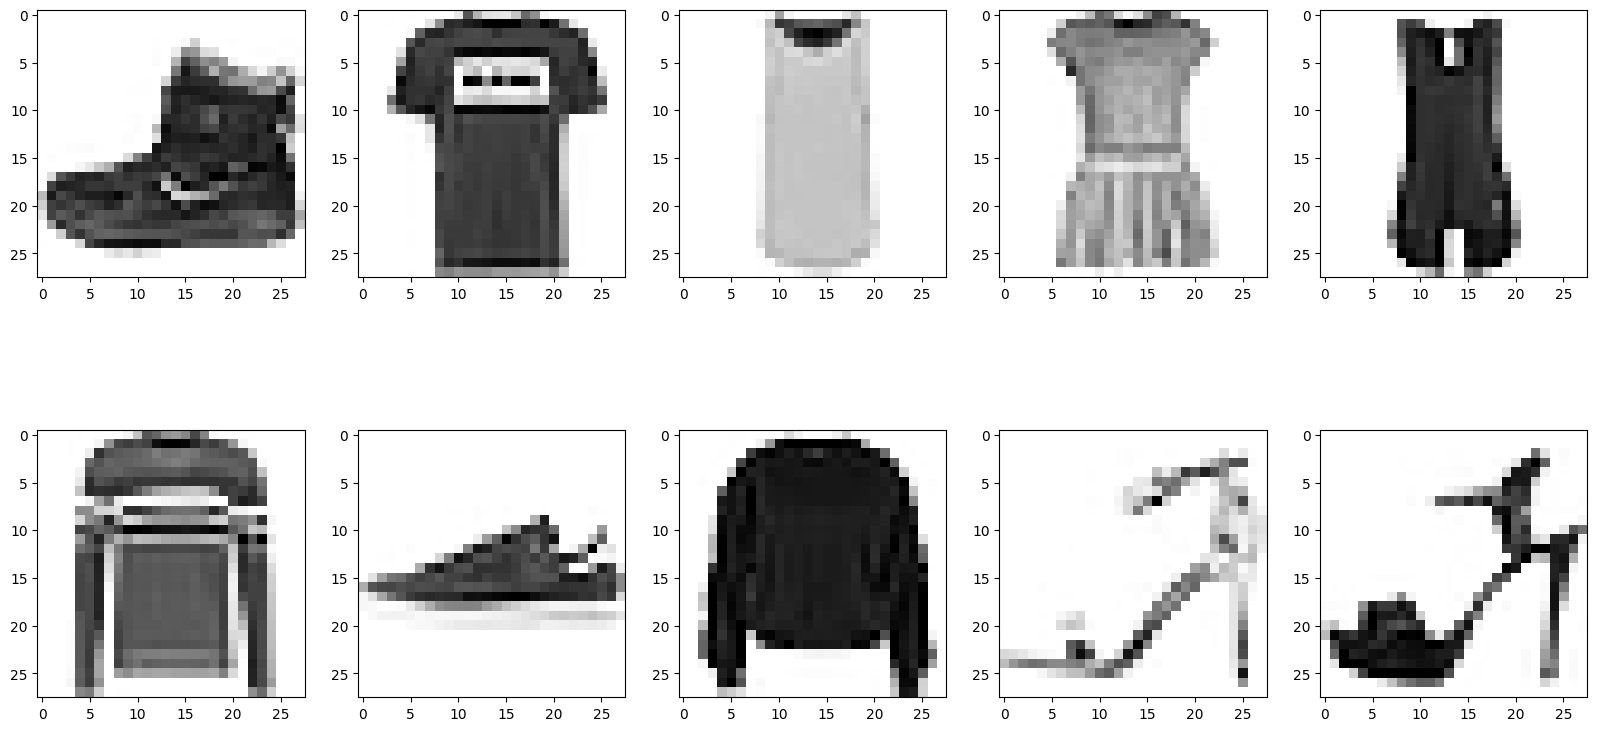

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'Greys'
plt.figure(figsize=(20,10))
ncols = 5
nrows = 2
for i, image in enumerate(x_train[:nrows*ncols]):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(image)

In [3]:
print("The tags for the previous images are:")
for i in range(nrows):
    print(y_train[i*ncols:(i+1)*ncols])

The tags for the previous images are:
[9 0 0 3 0]
[2 7 2 5 5]


## Preprocessing <a class="anchor" id="apartado1"></a>

In [4]:
print("Shape of image train set is: ", x_train.shape)
print("Shape of image test set is: ", x_test.shape)

Shape of image train set is:  (60000, 28, 28)
Shape of image test set is:  (10000, 28, 28)


In [5]:
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

print("Shape of image train set is: ", x_train.shape)
print("Shape of image test set is: ", x_test.shape)

Shape of image train set is:  (60000, 784)
Shape of image test set is:  (10000, 784)


In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
x_val = x_train[:10000] # Copy of x_train from the begining (0) to 9999
partial_x_train = x_train[10000:] # Copy of x_train from 10000 to the end
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Develop a classical neural network to predict class of each image <a class="anchor" id="apartado2"></a>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model1 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model2 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model3 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

for model in [model1, model2, model3]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history1 = model1.fit(partial_x_train, partial_y_train, epochs = 10, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history2 = model2.fit(partial_x_train, partial_y_train, epochs = 10, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history3 = model3.fit(partial_x_train, partial_y_train, epochs = 10, batch_size = 512, validation_data = (x_val, y_val), verbose=0)

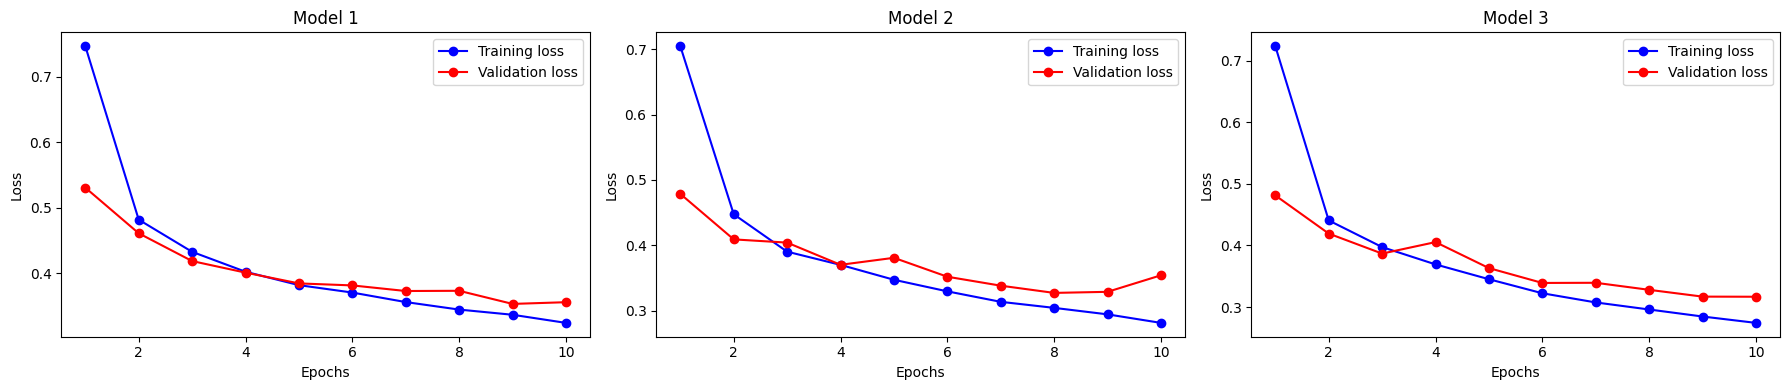

In [18]:
def compare_models(histories):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    for i, history in enumerate(histories):
        history_dict = history.history
        epochs = range(1, len(loss_values) + 1)
        axs[i].plot(epochs, history_dict['loss'], 'b-o', label='Training loss')
        axs[i].plot(epochs, history_dict['val_loss'], 'r-o', label='Validation loss')
        axs[i].set_title('Model {}'.format(i+1))
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel('Loss')
        axs[i].legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

compare_models([history1, history2, history3])

In [23]:
# Define the model
model1_ = Sequential([
    Flatten(input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model2_ = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Define the model
model3_ = Sequential([
    Flatten(input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

for model in [model1_, model2_, model3_]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history1_ = model1_.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history2_ = model2_.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)
history3_ = model3_.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose=0)

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

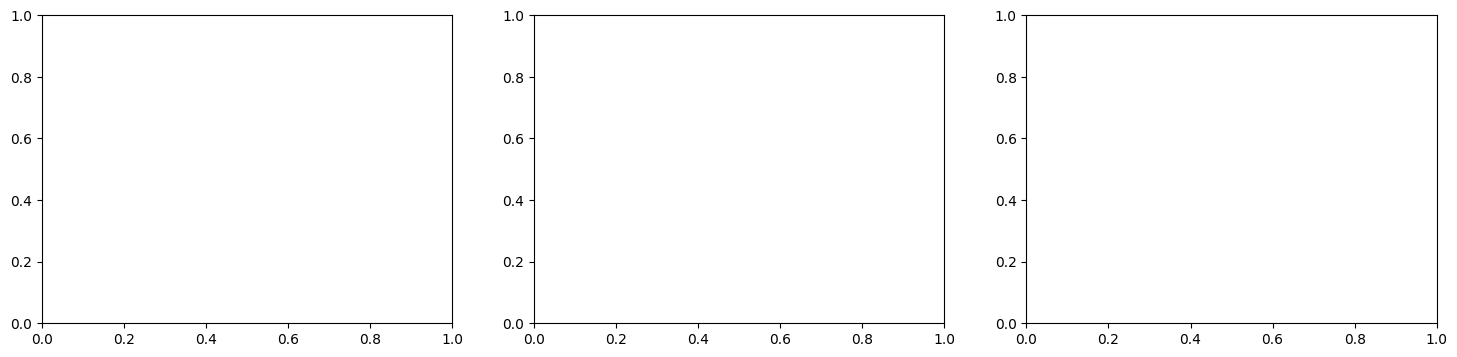

In [24]:
compare_models([history1_, history2_, history3_])

## Regularization <a class="anchor" id="apartado3"></a>

## Results <a class="anchor" id="apartado4"></a>

## Conclusions <a class="anchor" id="apartado5"></a>